# Bank Loan Prediction 

In [1]:
import pandas as pd 
import numpy as np

In [2]:
train = pd.read_csv('D:/PycharmProject/Bank Loan Prediction/Loan_Data/train.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Here are 614 rows and 13 columns in the given dataset

In [4]:
train.shape

(614, 13)

Convert Y & N of Loan_Status in the 1 & 0 respectively

In [5]:
train.Loan_Status = train.Loan_Status.map({'Y':1, 'N':0})

In [6]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [7]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


Checking for the Missing the Values...

In [8]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Preprocessing the Data...

In [9]:
Loan_status = train.Loan_Status
train.drop('Loan_Status',axis=1,inplace=True)

In [10]:
train.head()
#now here we drop the Loan_Status column

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [11]:
#loading the test dataset 
test = pd.read_csv('D:/PycharmProject/Bank Loan Prediction/Loan_Data/test.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [12]:
#taking the Loan_ID of Test dataset to the 'Loan_ID' variable
Loan_ID = test.Loan_ID

In [13]:
#merging the two dataset Train and Test together and taking into 'Data' variable...
data = train.append(test)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [14]:
data.shape

(981, 12)

In [15]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [16]:
#finding the missing values
data.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

In [17]:
data.Dependents.dtypes

dtype('O')

In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

<AxesSubplot:>

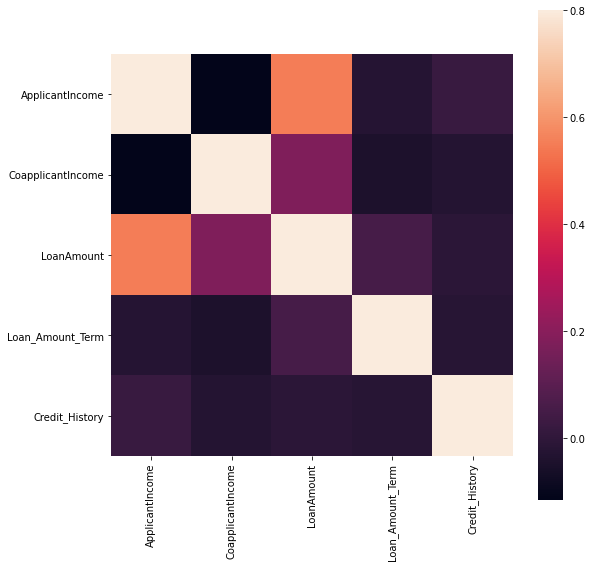

In [19]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

Label ENcoding...

In [20]:
## Label encoding for gender
data.Gender=data.Gender.map({'Male':1,'Female':0})

In [21]:
data.Gender.value_counts()

1.0    775
0.0    182
Name: Gender, dtype: int64

In [22]:
# Label Education
data.Education = data.Education.map({'Graduate':1, 'Not Graduate':0})

<AxesSubplot:>

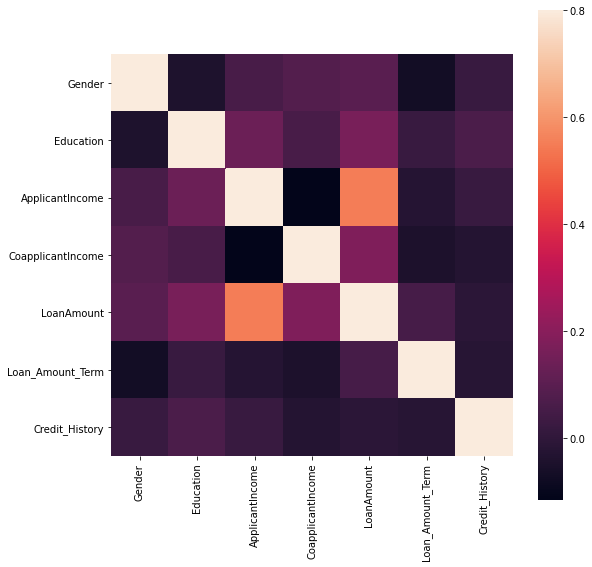

In [23]:
## Let's see correlations
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [24]:
# Label encoding for Martial Status
# Here we are label yes:1 & no:0
data.Married = data.Married.map({'Yes':1,'No':0})

In [25]:
data.Married.value_counts()

1.0    631
0.0    347
Name: Married, dtype: int64

In [26]:
#labelling for Dependents column
data.Dependents = data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [27]:
data.Dependents.value_counts()

0.0    545
2.0    160
1.0    160
3.0     91
Name: Dependents, dtype: int64

<AxesSubplot:>

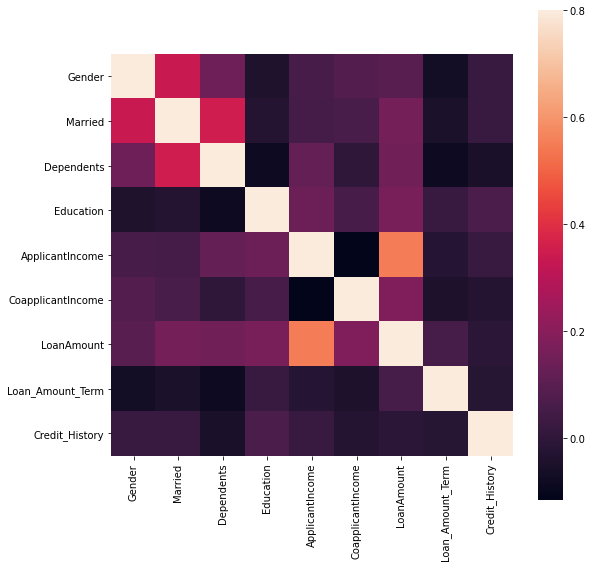

In [28]:
#Lets see the correlations for it 
corrmat = data.corr()
f,ax = plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [29]:
#Labelling for Self_Employed
data.Self_Employed = data.Self_Employed.map({'Yes':1,'No':0})

In [30]:
data.Self_Employed.value_counts()

0.0    807
1.0    119
Name: Self_Employed, dtype: int64

In [31]:
data.Property_Area.value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

In [32]:
# Labelling for Property_Area
data.Property_Area = data.Property_Area.map({'Rural':0,'Semiurban':1,'Urban':2})

In [33]:
data.Property_Area.value_counts()

1    349
2    342
0    290
Name: Property_Area, dtype: int64

<AxesSubplot:>

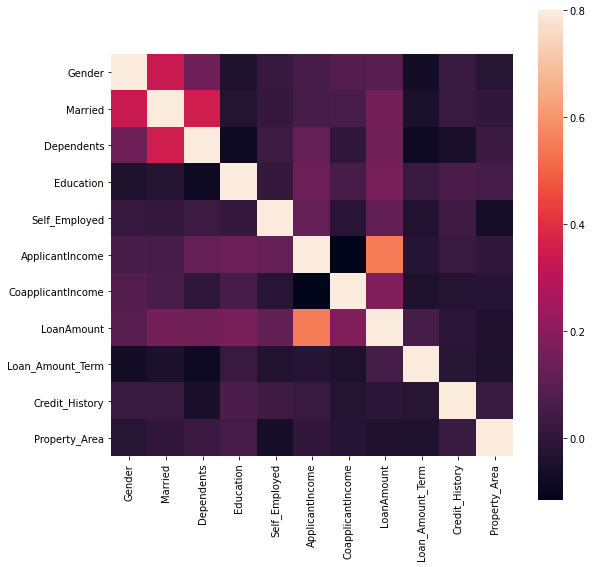

In [34]:
corrmat = data.corr()
f,ax = plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [35]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


In [36]:
data.Credit_History.size

981

It's Time To The Fill Missing The Values...

In [37]:
data.Credit_History.fillna(np.random.randint(0,2),inplace=True)

In [38]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History        0
Property_Area         0
dtype: int64

In [39]:
#Filling with the median 
data.LoanAmount.fillna(data.LoanAmount.median(),inplace=True)

In [40]:
#Filling with the mean
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(),inplace=True)

In [41]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [42]:
data.Married.fillna(np.random.randint(0,2),inplace=True)

In [43]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               0
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [44]:
data.Gender.value_counts()

1.0    775
0.0    182
Name: Gender, dtype: int64

In [45]:
#Filling Gender with random number between 0-2
from random import randint
data.Gender.fillna(np.random.randint(0,2),inplace=True)

In [46]:
data.Gender.value_counts()

1.0    799
0.0    182
Name: Gender, dtype: int64

In [47]:
#Filling Dependents with median
data.Dependents.fillna(data.Dependents.median(),inplace=True)

In [48]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

<AxesSubplot:>

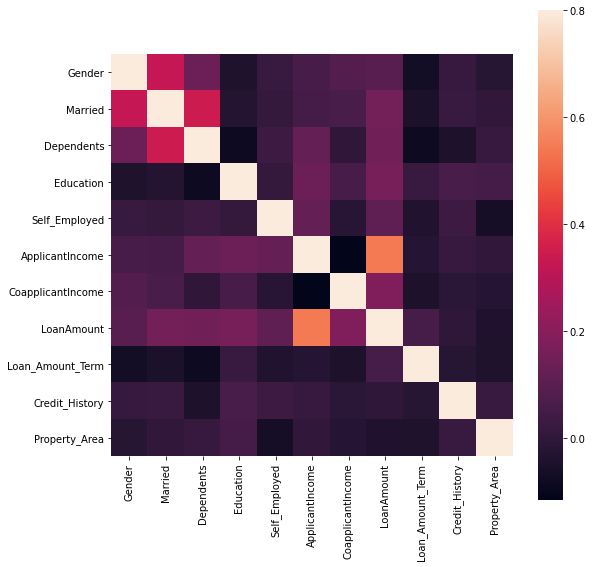

In [49]:
corrmat=data.corr()
f,ax = plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

In [50]:
data.Self_Employed.fillna(np.random.randint(0,2),inplace=True)

In [51]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [52]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,126.0,360.0,1.0,2
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


In [53]:
# Dropping Loan_ID from data, it's not useful
data.drop('Loan_ID',inplace=True,axis=1)

In [54]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [55]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,1,0.0,5849,0.0,126.0,360.0,1.0,2
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


In [56]:
data.size

10791

Split the Data into X & Y

In [57]:
train_X = data.iloc[:614,] # all the data in X (Train Set)
train_y = Loan_status # Loan status will be our Y

In [58]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(train_X,train_y,random_state=0)

In [59]:
train_X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
46,1.0,1.0,1.0,1,0.0,5649,0.0,44.0,360.0,1.0,2
272,1.0,0.0,0.0,1,0.0,2833,1857.0,126.0,360.0,1.0,0
474,1.0,0.0,2.0,1,0.0,5532,4648.0,162.0,360.0,1.0,0
382,0.0,0.0,0.0,1,0.0,6000,0.0,156.0,360.0,1.0,2
283,0.0,0.0,0.0,1,0.0,1811,1666.0,54.0,360.0,1.0,2


In [60]:
test_X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
454,1.0,0.0,0.0,1,1.0,7085,0.0,84.0,360.0,1.0,1
52,0.0,0.0,0.0,1,0.0,4230,0.0,112.0,360.0,1.0,1
536,1.0,1.0,0.0,1,0.0,6133,3906.0,324.0,360.0,1.0,2
469,1.0,1.0,0.0,1,0.0,4333,2451.0,110.0,360.0,1.0,2
55,1.0,1.0,2.0,1,0.0,2708,1167.0,97.0,360.0,1.0,1


Using Machine Leanring Algorithm...

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
model = LogisticRegression()
model.fit(train_X,train_y)

LogisticRegression()

In [63]:
pred = model.predict(test_X)
print(pred)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 0 1 1 1 0]


Checking the accuracy of the model...

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
print("Model Accuracy: ",accuracy_score(test_y,pred))

Model Accuracy:  0.8376623376623377


Confusion Matrix

In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
print('Confusion Matrix:')
confusion_matrix(test_y,pred)

Confusion Matrix:


array([[ 20,  23],
       [  2, 109]], dtype=int64)

Classifiaction Report

In [68]:
from sklearn.metrics import classification_report

In [69]:
print("Classification Report:")
classification_report(test_y,pred)

Classification Report:


'              precision    recall  f1-score   support\n\n           0       0.91      0.47      0.62        43\n           1       0.83      0.98      0.90       111\n\n    accuracy                           0.84       154\n   macro avg       0.87      0.72      0.76       154\nweighted avg       0.85      0.84      0.82       154\n'

In [70]:
X_test = data.iloc[614:,]

In [71]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1.0,0.0,1,0.0,5720,0.0,110.0,360.0,1.0,2
1,1.0,1.0,1.0,1,0.0,3076,1500.0,126.0,360.0,1.0,2
2,1.0,1.0,2.0,1,0.0,5000,1800.0,208.0,360.0,1.0,2
3,1.0,1.0,2.0,1,0.0,2340,2546.0,100.0,360.0,1.0,2
4,1.0,0.0,0.0,0,0.0,3276,0.0,78.0,360.0,1.0,2


In [72]:
prediction = model.predict(X_test)

In [73]:
prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [74]:
#Taken Data from the dataset
t = model.predict([[1.0, 1.0, 0.0, 1, 0.0, 5720, 0.0, 110.0, 360.0, 1.0, 2]])

In [75]:
print(t)
if (t==1):
    print("Customer is eligible for Loan")
else:
    print("Customer is not eligible for Loan")

[1]
Customer is eligible for Loan


Saving the model...

In [80]:
import os
os.chdir("D:/PycharmProject/Bank Loan Prediction/Model")

In [82]:
import pickle
pickle.dump(model, open('bank_loan_model.pkl','wb'))

Testing the model...

In [84]:
loaded_model = pickle.load(open('bank_loan_model.pkl', 'rb'))

In [85]:
testing = loaded_model.predict([[0.0, 0.0, 0.0, 1, 0.0, 4230, 0.0, 112.0, 360.0, 1.0, 1]])

In [87]:
print(testing)

[1]


In [88]:
if (t==1):
    print("Customer is eligible for Loan")
else:
    print("Customer is not eligible for Loan")

Customer is eligible for Loan


Great! We are Succeccfully created the Model...